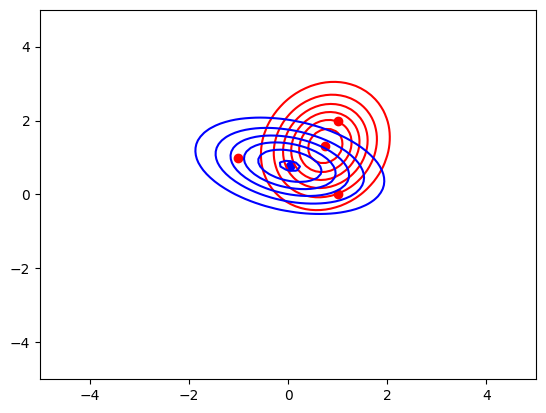

In [1]:
#Given the bivariate observations {(1 2) , (−1 1 ) , (1 0)},
#and the multivariate Gaussian mixture
#𝐮1 = (2 2) , 𝐮2 = (0 0) , 𝚺1 = (2 1 1 2) , 𝚺2 = (2 0 0 2) , 𝜋1 = 0.5, 𝜋2 = 0.5.

#Perform one epoch of the EM clustering algorithm and determine the new parameters.
#Indicate all calculus step by step (you can use a computer, however disclose intermediary steps).


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import multivariate_normal

#data
x1 = np.array([1,2])
x2 = np.array([-1,1])
x3 = np.array([1,0])
X = np.array([x1,x2,x3])

#parameters
u1 = np.array([2,2])
u2 = np.array([0,0])
S1 = np.array([[2,1],[1,2]])
S2 = np.array([[2,0],[0,2]])
pi1 = 0.5
pi2 = 0.5

#E-step
#p(x|u1,S1)
p1 = multivariate_normal.pdf(X, u1, S1)
#p(x|u2,S2)
p2 = multivariate_normal.pdf(X, u2, S2)

#p(z|x)
p1x = pi1*p1/(pi1*p1+pi2*p2)
p2x = pi2*p2/(pi1*p1+pi2*p2)

#print(p1x)
#print(p2x)

#M-step
#u1
u1 = np.sum(p1x[:,np.newaxis]*X, axis=0)/np.sum(p1x)
#u2
u2 = np.sum(p2x[:,np.newaxis]*X, axis=0)/np.sum(p2x)

#print(u1)
#print(u2)

#S1
#covariance matrix 

S1 = np.zeros((2,2))
for i in range(3):
    S1 += p1x[i]*np.outer(X[i]-u1,X[i]-u1)
S1 = S1/np.sum(p1x)

#print(S1)

#S1 = np.sum(p1x[:,np.newaxis,np.newaxis]*(X[:,np.newaxis,:]-u1[np.newaxis,:])*(X[:,np.newaxis,:]-u1[np.newaxis,:]), axis=0)/np.sum(p1x)
#S2
#covariance matrix

S2 = np.zeros((2,2))
for i in range(3):
    S2 += p2x[i]*np.outer(X[i]-u2,X[i]-u2)
S2 = S2/np.sum(p2x)

#print(S2)


#S2 = np.sum(p2x[:,np.newaxis,np.newaxis]*(X[:,np.newaxis,:]-u2[np.newaxis,:])*(X[:,np.newaxis,:]-u2[np.newaxis,:]), axis=0)/np.sum(p2x)

#print(S2)

#pi1
pi1 = np.sum(p1x)/len(X)
#pi2
pi2 = np.sum(p2x)/len(X)

#print(pi1)
#print(pi2)

#plot
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z1 = multivariate_normal.pdf(pos, u1, S1)
Z2 = multivariate_normal.pdf(pos, u2, S2)
plt.contour(X, Y, Z1, colors='red')
plt.contour(X, Y, Z2, colors='blue')
plt.scatter(x1[0],x1[1], color='red')
plt.scatter(x2[0],x2[1], color='red')
plt.scatter(x3[0],x3[1], color='red')
plt.scatter(u1[0],u1[1], color='red')
plt.scatter(u2[0],u2[1], color='blue')
plt.show()
